<a href="https://colab.research.google.com/github/MMR1318/Maheshreddy_INFO5731_Fall2024/blob/main/Mottakatla_Maheshreddy_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [2]:
!pip install bertopic
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from bertopic import BERTopic
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
file_path = 'film_reviews.csv'
data = pd.read_csv(file_path)
data.head()

,1,review,sentiment
0,2,This is one of those unfortunate films that su...,positive
1,3,Okay maybe it was because I happen to be in Ya...,positive
2,4,"Although I love this movie, I can barely watch...",positive
3,5,"A man arrives in a strange, beautiful, sterile...",positive
4,6,I'm sitting around going through movie listing...,positive


In [9]:
# Step 1: Preprocessing
! pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

data['cleaned_review'] = data['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


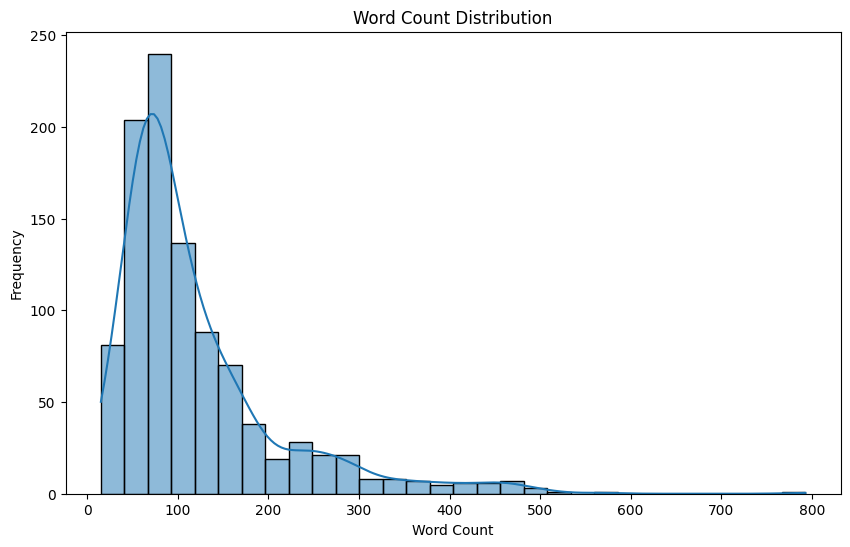

In [10]:
# Step 2: EDA
# Word Count Distribution
data['word_count'] = data['cleaned_review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data['word_count'], bins=30, kde=True)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

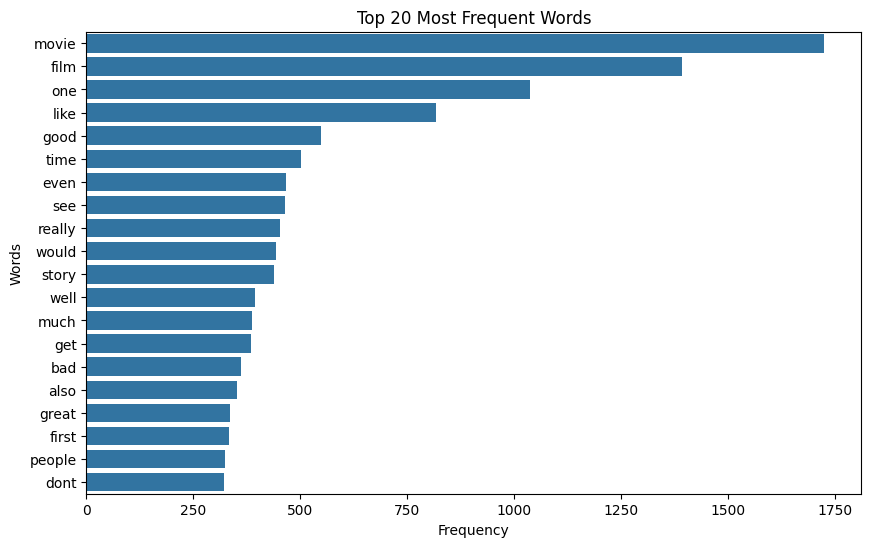

In [ ]:
# Most Frequent Words
from collections import Counter
all_words = ' '.join(data['cleaned_review']).split()
most_common_words = Counter(all_words).most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [11]:
# Step 2: Feature Representation
# Use CountVectorizer for LDA
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count_data = count_vectorizer.fit_transform(data['cleaned_review'])

# Use TF-IDF for LSA
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_data = tfidf_vectorizer.fit_transform(data['cleaned_review'])

In [12]:
# Step 2: Feature Representation
# Use CountVectorizer for LDA
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count_data = count_vectorizer.fit_transform(data['cleaned_review'])

# Use TF-IDF for LSA
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_data = tfidf_vectorizer.fit_transform(data['cleaned_review'])

In [13]:
# Step 3: LDA Topic Modeling
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(count_data)

# Extract LDA Topics
lda_topics = []
lda_feature_names = count_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [lda_feature_names[i] for i in topic.argsort()[:-11:-1]]
    lda_topics.append(top_words)

# Step 4: LSA Topic Modeling
lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_model.fit(tfidf_data)

# Extract LSA Topics
lsa_topics = []
lsa_feature_names = tfidf_vectorizer.get_feature_names_out()
for i, comp in enumerate(lsa_model.components_):
    top_words = [lsa_feature_names[j] for j in comp.argsort()[:-11:-1]]
    lsa_topics.append(top_words)

In [ ]:
data

,1,review,sentiment,cleaned_review,word_count
0,2,This is one of those unfortunate films that su...,positive,one unfortunate films suffered even sad unfort...,75
1,3,Okay maybe it was because I happen to be in Ya...,positive,okay maybe happen yangchun china saw movie may...,153
2,4,"Although I love this movie, I can barely watch...",positive,although love movie barely watch real put toni...,459
3,5,"A man arrives in a strange, beautiful, sterile...",positive,man arrives strange beautiful sterile city noo...,70
4,6,I'm sitting around going through movie listing...,positive,im sitting around going movie listings really ...,76
...,...,...,...,...,...
995,997,"yeah, it's a bit of a silly film, so if you ar...",positive,yeah bit silly film looking oscar performance ...,61
996,998,I finally got hold of a DVD copy of this produ...,negative,finally got hold dvd copy production agog curi...,430
997,999,"As others have noted, this movie is criminally...",negative,others noted movie criminally inaccurate portr...,43
998,1000,I nearly fell asleep during a screening of thi...,negative,nearly fell asleep screening boring story seem...,250


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

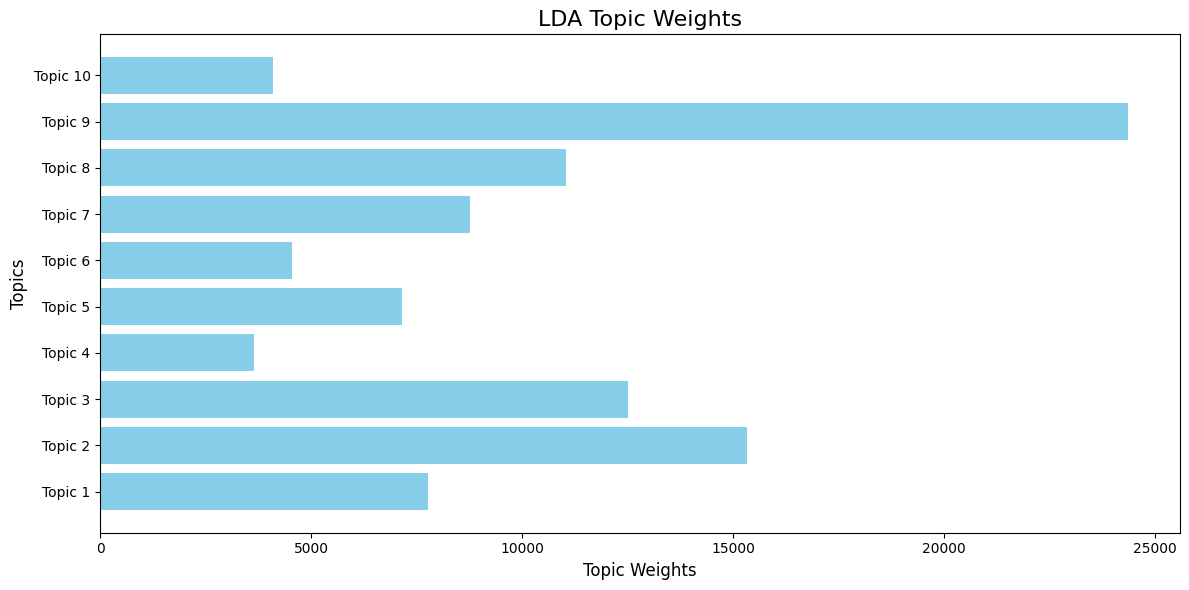

In [14]:
# Step 5: BERTopic Topic Modeling
bertopic_model = BERTopic()
bertopic_topics, _ = bertopic_model.fit_transform(data['cleaned_review'])

results = {
    "LDA Topics": lda_topics,
    "LSA Topics": lsa_topics,
    "BERTopic Topics": bertopic_model.get_topic_info()
}

# Step 6: Visualize LDA Topic Weights
plt.figure(figsize=(12, 6))

# Calculate the weight of each topic
lda_topic_weights = [sum(lda_model.components_[idx]) for idx in range(len(lda_topics))]

# Plot the weights for each topic
plt.barh([f"Topic {idx+1}" for idx in range(len(lda_topics))], lda_topic_weights, color='skyblue')
plt.title("LDA Topic Weights", fontsize=16)
plt.xlabel("Topic Weights", fontsize=12)
plt.ylabel("Topics", fontsize=12)
plt.tight_layout()
plt.savefig("lda_topic_weights.png", dpi=300)
plt.show()

In [15]:
# Convert LDA and LSA topics to a readable format
print("\nLDA Topics:")
for idx, topic in enumerate(lda_topics, 1):
    print(f"Topic {idx}: {', '.join(topic)}")

print("\nLSA Topics:")
for idx, topic in enumerate(lsa_topics, 1):
    print(f"Topic {idx}: {', '.join(topic)}")

# Print BERTopic Topics
print("\nBERTopic Topics:")
print(results["BERTopic Topics"])



LDA Topics:
Topic 1: movie, like, film, really, people, good, better, make, think, time
Topic 2: movie, film, like, good, time, people, life, make, way, best
Topic 3: movie, film, like, story, really, time, acting, dont, good, movies
Topic 4: film, make, characters, matrix, really, real, know, story, wars, films
Topic 5: film, like, scene, movie, way, story, great, dont, think, seen
Topic 6: movie, film, story, characters, like, time, really, scenes, great, screen
Topic 7: film, like, movie, love, way, people, story, little, time, dont
Topic 8: film, movie, like, time, story, scene, love, man, woman, good
Topic 9: movie, film, like, good, bad, really, time, story, movies, seen
Topic 10: episode, series, film, love, jon, life, time, garfield, good, episodes

LSA Topics:
Topic 1: movie, film, like, good, really, bad, time, story, dont, movies
Topic 2: movie, movies, bad, waste, didnt, want, watched, watch, dont, stupid
Topic 3: bad, film, terrible, acting, awful, worst, cheap, effects, 



#### **1. Features (Text Representation) Used for Topic Modeling**
The following feature extraction techniques were used:
- **Count Vectorizer (LDA):**
  - Converts text into a bag-of-words representation, capturing term frequencies while ignoring the order of words.
  - Excludes stopwords and terms with low document frequency (`min_df=2`).
- **TF-IDF Vectorizer (LSA):**
  - Weighs terms based on their frequency documents according to their occurrence across the corpus.
  - Highlights informative terms while down-weighting common terms like stopwords
- **Sentence Embeddings (BERTopic):**
  - Utilizes a pre-trained sentence transformer to embed reviews into high-dimensional vectors, enabling semantic topic clustering.

#### **3. Summary and Description of Each Cluster**

**LDA Topics:**
1. **Topic 1:** General impressions of movies and films, focusing on audience opinions.
2. **Topic 2:** Movies and life themes, emphasizing good storytelling and impactful moments.
3. **Topic 3:** Focused on stories and acting quality, discussing narrative depth.
4. **Topic 4:** Includes sci-fi or fantasy films like *The Matrix* and *Star Wars*.
5. **Topic 5:** Highlights scenes and storytelling with mixed positive and critical elements.
6. **Topic 6:** Centers on characters, story depth, and visual appeal of movies.
7. **Topic 7:** Emphasizes emotions, love, and the human aspect of films.
8. **Topic 8:** Discusses romantic and dramatic themes, often focusing on relationships.
9. **Topic 9:** Reviews contrasting good and bad movies, highlighting their differences.
10. **Topic 10:** TV episodes and film series, referencing specific characters like Jon or Garfield.

**LSA Topics:**
1. **Topic 1:** General review discussions, balancing good and bad opinions.
2. **Topic 2:** Negative reviews about wasted time and unwatchable movies.
3. **Topic 3:** Focuses on bad acting, poor scripts, and terrible effects.
4. **Topic 4:** Positive reviews about life-changing films and great cinematic experiences.
5. **Topic 5:** TV series and episodic content, including remakes and adaptations.
6. **Topic 6:** Expressive reviews about emotions like love, passion, and relationships in films.
7. **Topic 7:** Focused on performances, cast, and character development.
8. **Topic 8:** War and historical films, discussing realism and characters.
9. **Topic 9:** Reviews about book adaptations and their storylines.
10. **Topic 10:** Comedy films, highlighting humor and characters.

**BERTopic Topics:**
1. **Topic 0:** General film reviews with balanced sentiments.
2. **Topic 1:** Negative feedback on poor-quality films.
3. **Topic 2:** Analysis and opinions about TV series and episodes.
4. **Topic 3:** Discussions on war-themed films and historical context.
5. **Topic 4:** Romantic films focusing on relationships and life themes.
6. **Topic 5:** Disney and martial arts films, with niche audiences.
7. **Topic 6:** Critiques of films with a focus on acting and story elements.



# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
file_path = 'film_reviews.csv'
data = pd.read_csv(file_path)
data.head()

,1,review,sentiment
0,2,This is one of those unfortunate films that su...,positive
1,3,Okay maybe it was because I happen to be in Ya...,positive
2,4,"Although I love this movie, I can barely watch...",positive
3,5,"A man arrives in a strange, beautiful, sterile...",positive
4,6,I'm sitting around going through movie listing...,positive


In [17]:


# Step 1: Preprocessing
# Lowercase text, remove special characters, and remove stopwords
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

data['cleaned_review'] = data['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:

# Step 2: Feature Extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_review'])

y = data['sentiment'].map({'positive': 1, 'negative': 0})

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
#Model 1 - Logistic Regression
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)

# Cross-validation for Logistic Regression
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=cv, scoring='accuracy')

# Model 2 - Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')

# Evaluation
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{model_name} Performance on Test Set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Evaluate Logistic Regression
evaluate_model(lr_model, X_test, y_test, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(rf_model, X_test, y_test, "Random Forest Classifier")






Logistic Regression Performance on Test Set:
Accuracy: 0.7950
Precision: 0.7988
Recall: 0.7950
F1 Score: 0.7945

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.79       101
           1       0.76      0.85      0.80        99

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200


Random Forest Classifier Performance on Test Set:
Accuracy: 0.8050
Precision: 0.8066
Recall: 0.8050
F1 Score: 0.8048

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       101
           1       0.78      0.84      0.81        99

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200



### **1. Features for Sentiment Classification**
- **TF-IDF:** Selected for converting text into numerical features by focusing on important words while down-weighting common terms.
- **Why TF-IDF?**
  - Reduces noise by filtering irrelevant words.
  - Efficient for high-dimensional data like text.
  - Works well with machine learning models.

---

### **2. Selected Supervised Learning Algorithms**
1. **Logistic Regression:**
   - Chosen for its efficiency with sparse data like TF-IDF.
   - A strong baseline for binary classification.

2. **Random Forest Classifier:**
   - Chosen for its ability to handle feature interactions and robustness against overfitting.
   - Performs well on imbalanced datasets.

- **Cross-Validation:** 5-fold cross-validation ensures the models generalize well on unseen data.

---

### **3. Performance Comparison**
1. **Logistic Regression:**
   - Accuracy: 79.50%, Precision: 79.88%, Recall: 79.50%, F1 Score: 79.45%.

2. **Random Forest:**
   - Accuracy: 80.50%, Precision: 80.66%, Recall: 80.50%, F1 Score: 80.48%.

#### **Conclusion:**
- Both models performed well, but Random Forest slightly outperformed Logistic Regression in all metrics. TF-IDF proved effective for sentiment classification.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [22]:
# Write your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
# Step 1: Summary of the dataset
print("Dataset Information:")
print(train.info())

print("\nMissing Values:")
print(train.isnull().sum().sort_values(ascending=False).head(20))

print("\nDescriptive Statistics:")
print(train.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   

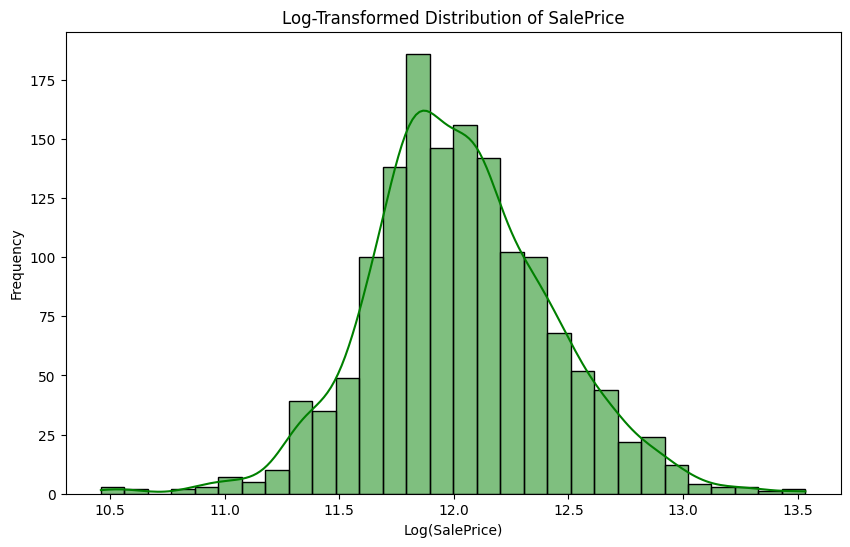

In [24]:
# Log-transformed SalePrice distribution
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(train['SalePrice']), kde=True, bins=30, color='green')
plt.title('Log-Transformed Distribution of SalePrice')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Step 2: Data Cleaning
# Drop columns with excessive missing values (>50%)
missing_ratio = train.isnull().sum() / len(train)
train = train.drop(columns=missing_ratio[missing_ratio > 0.5].index)

# Fill numerical missing values with median
for col in train.select_dtypes(include=['float64', 'int64']):
    train[col] = train[col].fillna(train[col].median())

# Fill categorical missing values with mode
for col in train.select_dtypes(include=['object']):
    train[col] = train[col].fillna(train[col].mode()[0])

# Repeat cleaning steps for test data
for col in test.select_dtypes(include=['float64', 'int64']):
    test[col] = test[col].fillna(test[col].median())

for col in test.select_dtypes(include=['object']):
    test[col] = test[col].fillna(test[col].mode()[0])

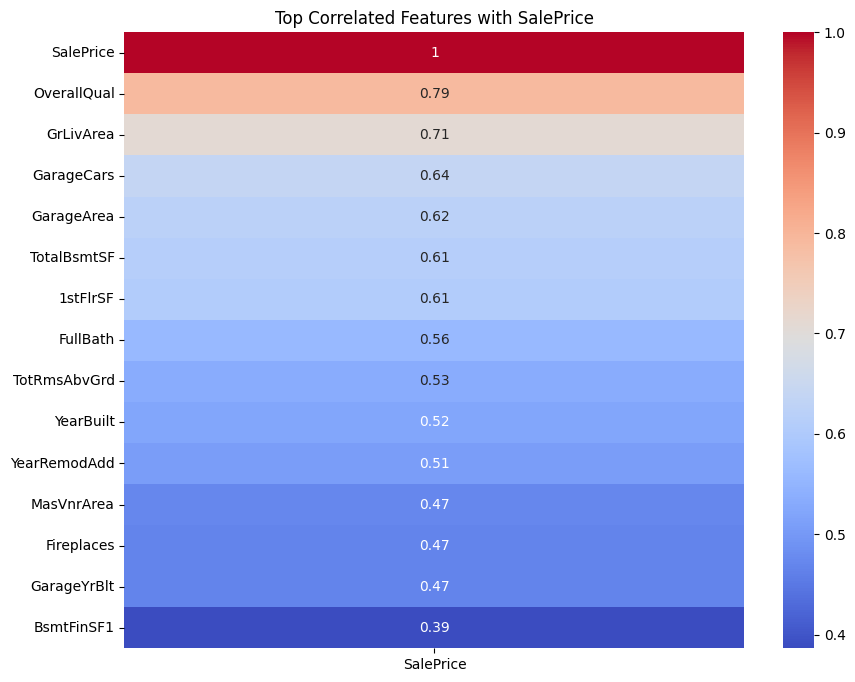

In [26]:
# only numeric columns for correlation
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train[numeric_cols].corr()

# Plot the top correlated features with SalePrice
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix['SalePrice'].sort_values(ascending=False)[:15].to_frame(),
            annot=True, cmap='coolwarm')
plt.title("Top Correlated Features with SalePrice")
plt.show()


In [27]:
# important features
selected_features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces','GarageYrBlt','BsmtFinSF1'
]
X = train[selected_features]
y = train['SalePrice']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

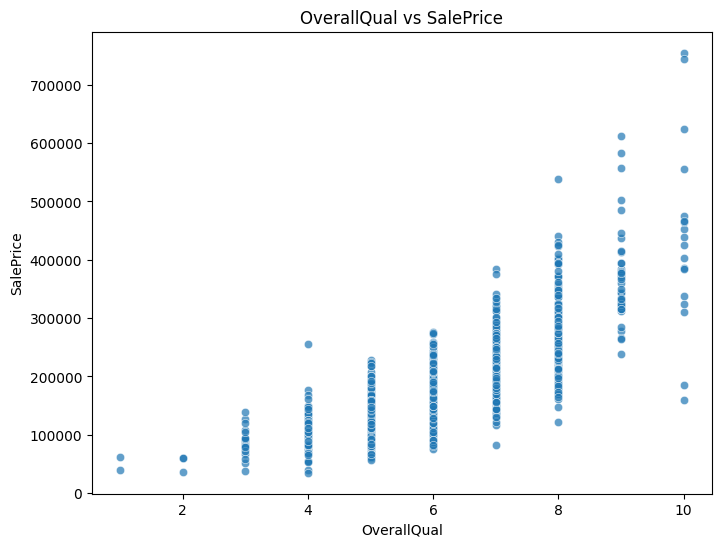

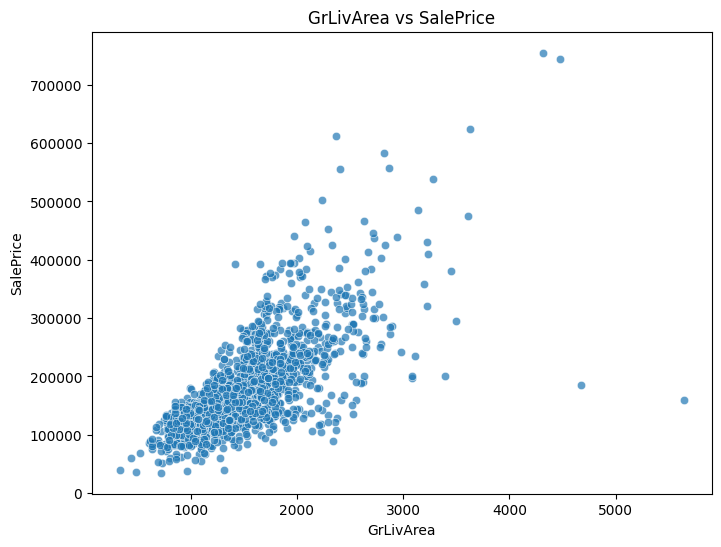

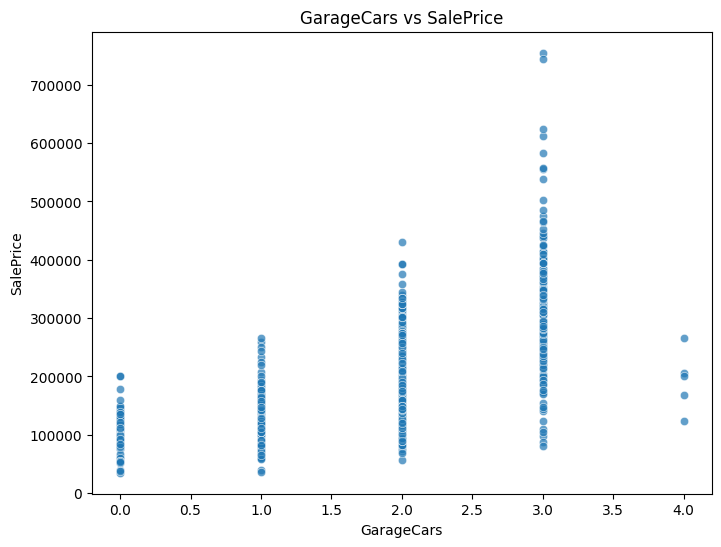

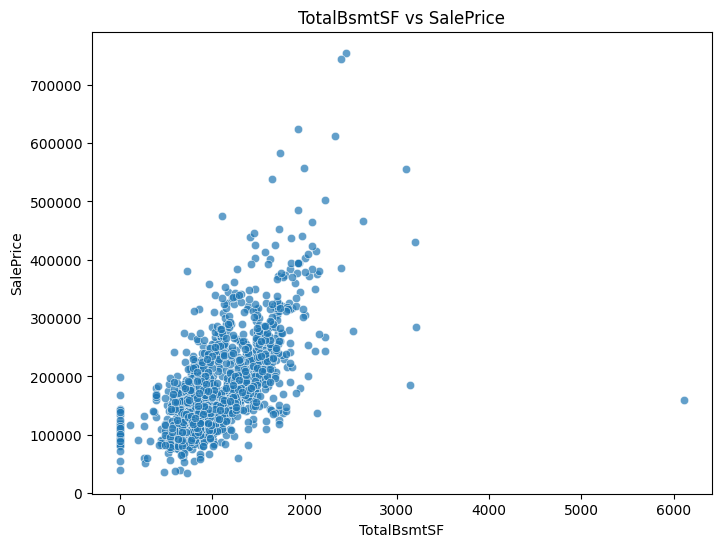

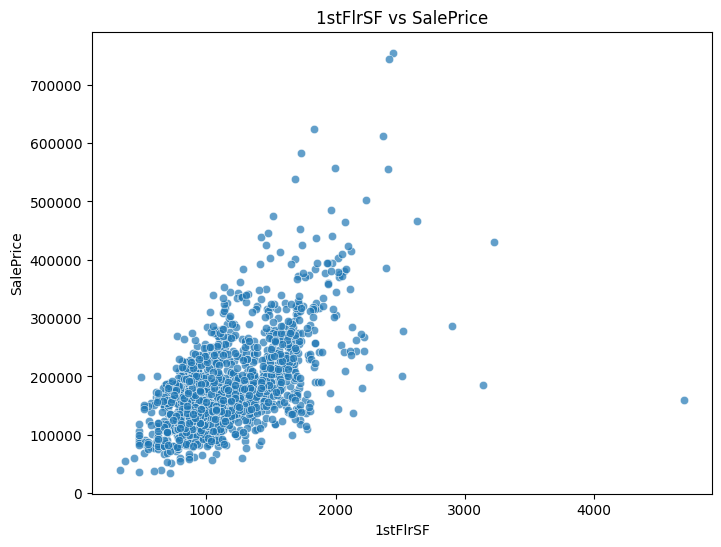

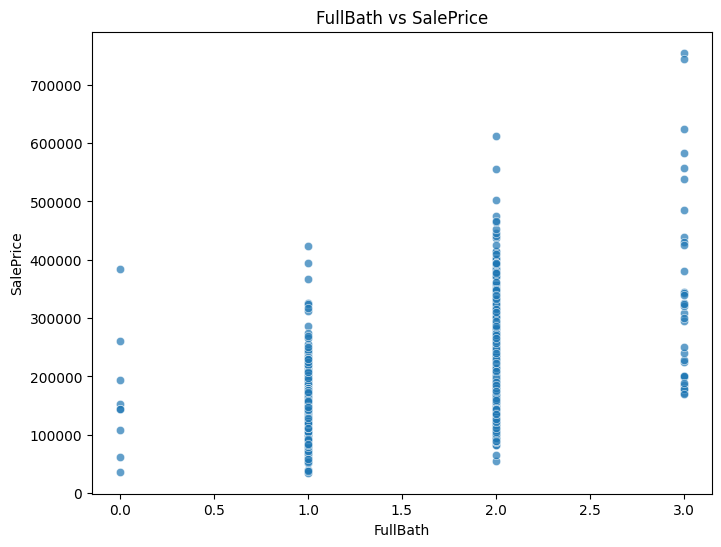

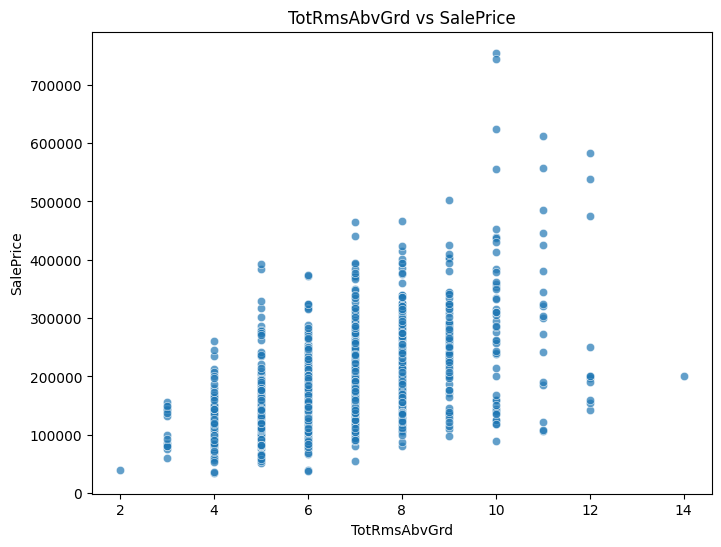

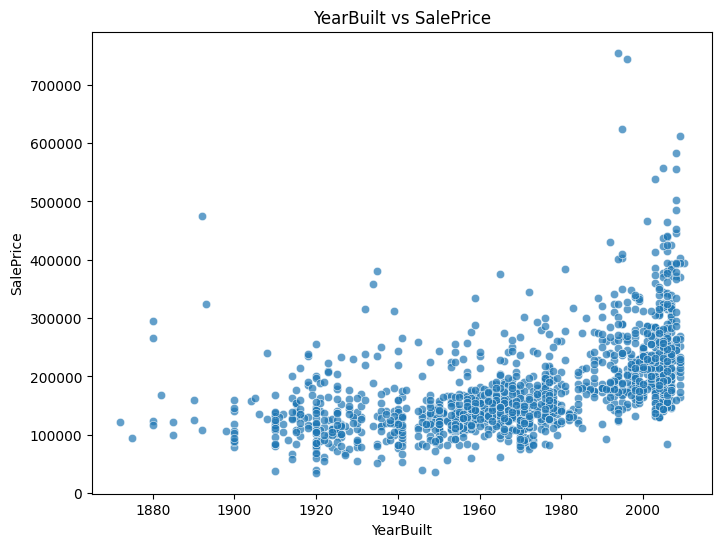

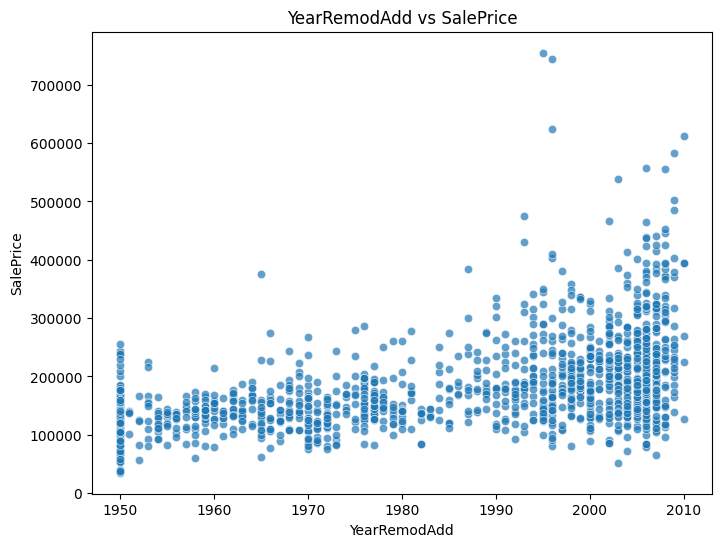

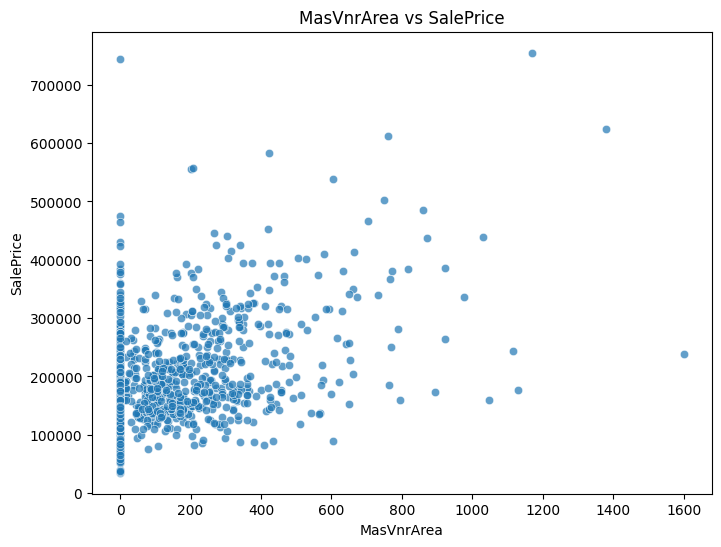

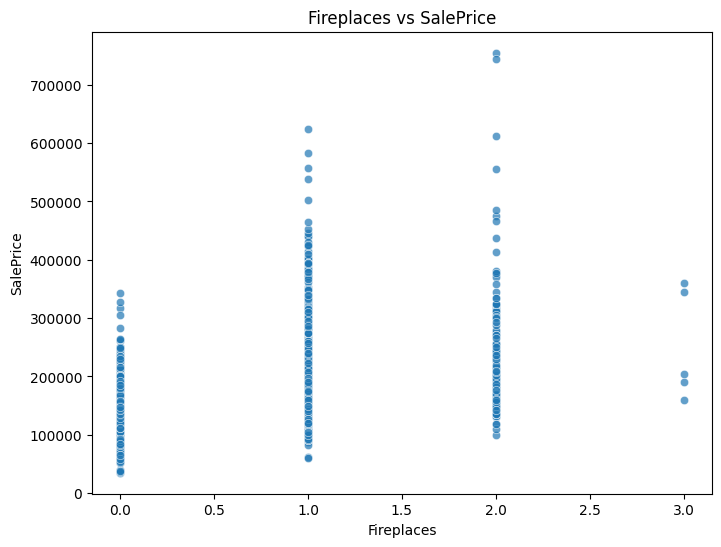

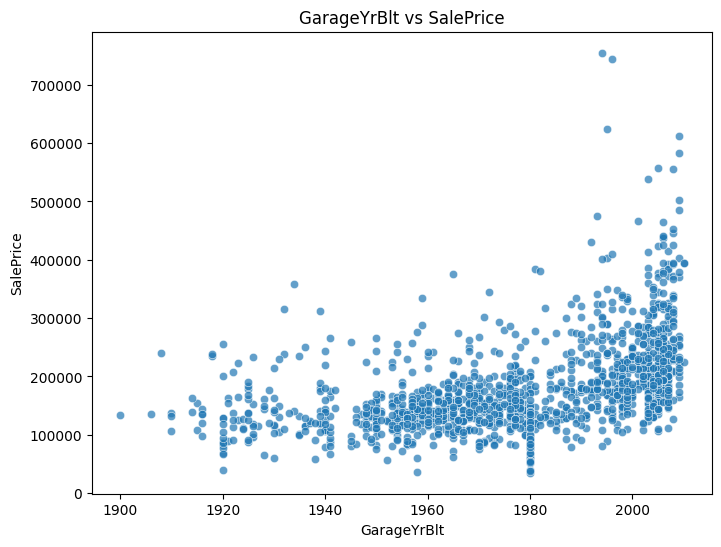

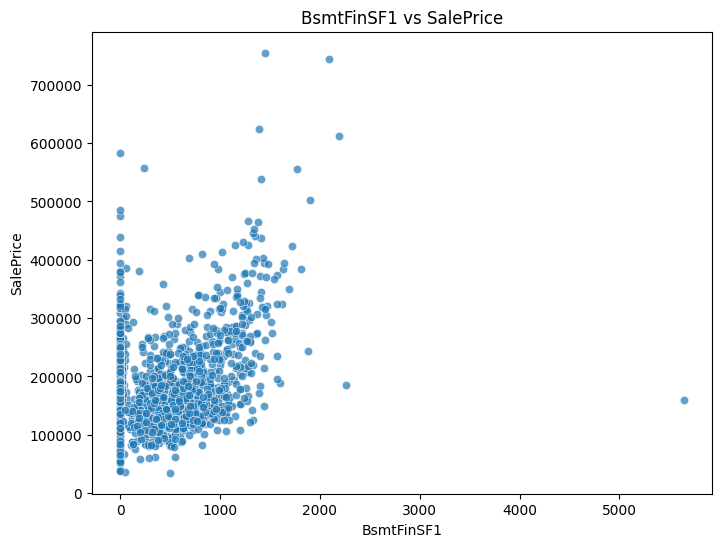

In [28]:
# Scatter plots for numerical features vs SalePrice
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=train[feature], y=train['SalePrice'], alpha=0.7)
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

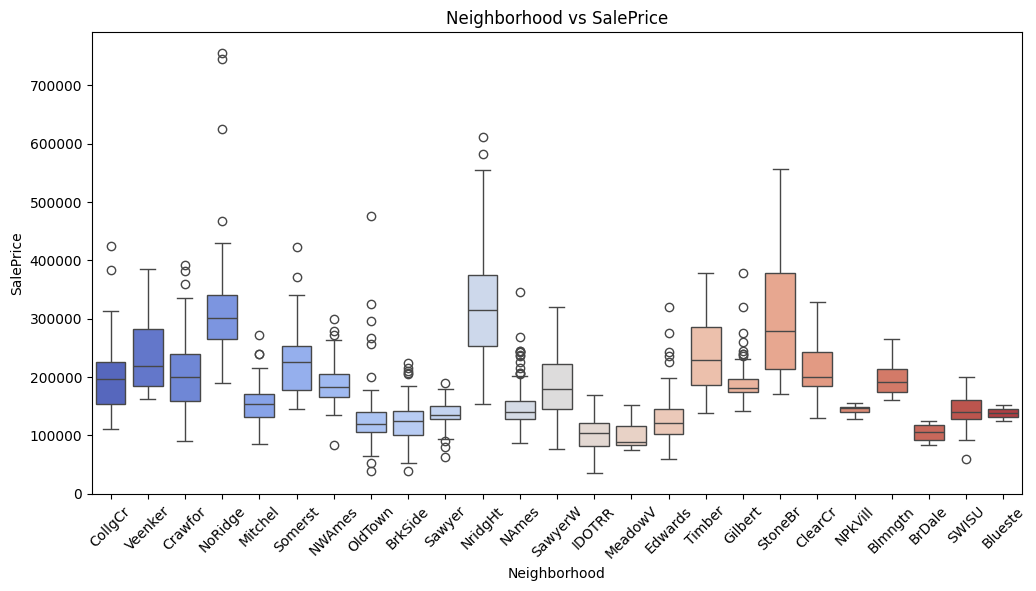

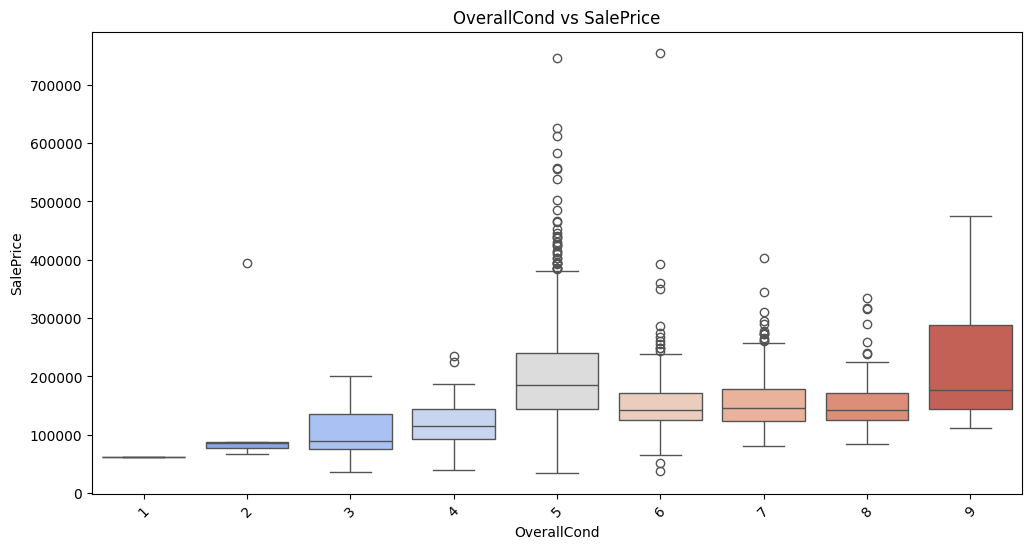

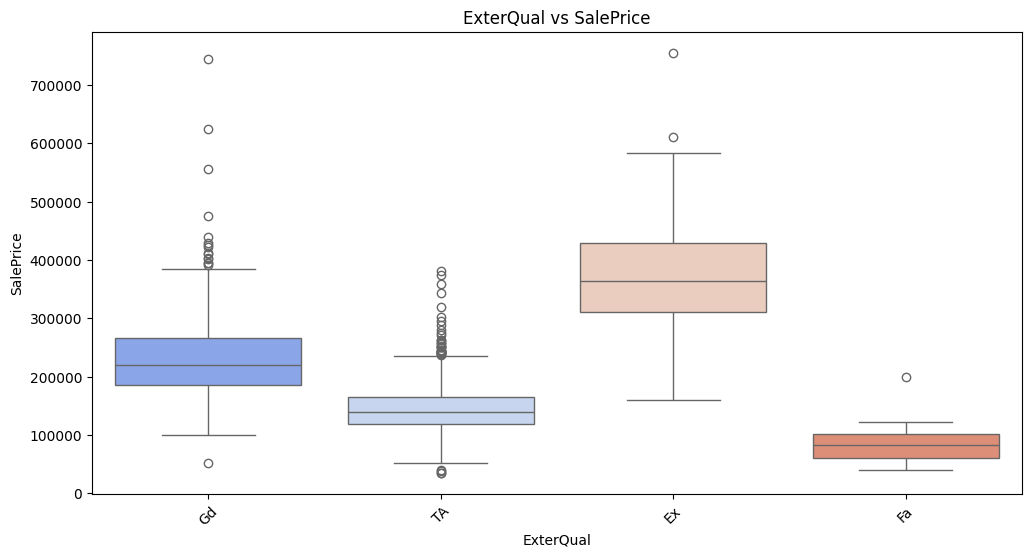

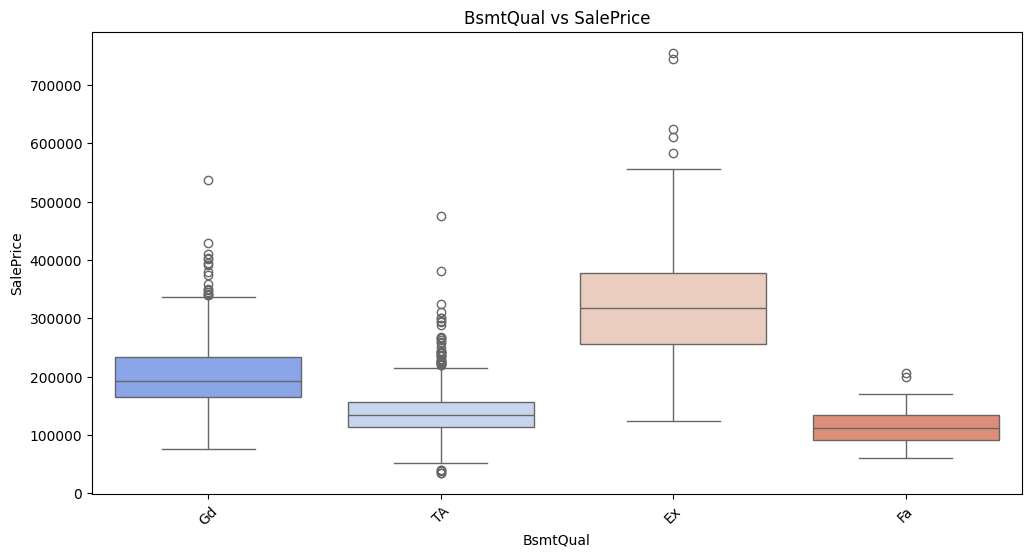

In [29]:
# Step 6: Categorical Features vs SalePrice
categorical_features = ['Neighborhood', 'OverallCond', 'ExterQual', 'BsmtQual']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=train[feature], y=train['SalePrice'], palette='coolwarm')
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45)
    plt.show()

In [30]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

# Step 5: Evaluation
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print("-" * 30)

evaluate_model("Linear Regression", y_val, y_pred_lr)
evaluate_model("Random Forest Regressor", y_val, y_pred_rf)

# Predictions on Test Data
test_features = test[selected_features]
test['SalePrice_Predicted'] = rf_model.predict(test_features)




Linear Regression Performance:
Mean Squared Error (MSE): 1447735913.20
Mean Absolute Error (MAE): 24487.23
R-squared (R²): 0.81
------------------------------
Random Forest Regressor Performance:
Mean Squared Error (MSE): 888585924.63
Mean Absolute Error (MAE): 18811.99
R-squared (R²): 0.88
------------------------------


#### **Exploratory Data Analysis (EDA):**
1. **Correlation with SalePrice:**
   - A heatmap of numerical features showed high correlation with `SalePrice` for features like `OverallQual`, `GrLivArea`, `GarageCars`, and `TotalBsmtSF`.

2. **Missing Values:**
   - Numerical features were filled with the median, and categorical features were filled with the mode.

3. **Feature Importance:**
   - Based on domain knowledge and correlation analysis, the most relevant features for predicting `SalePrice` were identified.

#### **Selected Features:**
- `OverallQual`: Quality of the house.
- `GrLivArea`: Above-ground living area square footage.
- `GarageCars`: Size of the garage in car capacity.
- `TotalBsmtSF`: Total square footage of the basement.
- `1stFlrSF`: First-floor square footage.
- `FullBath`: Number of full bathrooms above grade.
- `TotRmsAbvGrd`: Total number of rooms above grade.
- `YearBuilt`: Original construction year.
- `YearRemodAdd`: Year of remodel.
- `MasVnrArea`: Masonry veneer area in square feet.
- `Fireplaces`: Number of fireplaces.
- `GarageYrBlt`: Year the garage was built.
- `BsmtFinSF1`: Finished square footage of the basement.

**Why Selected?**
- These features have strong correlations with `SalePrice` and provide a mix of structural and quality-related variables, ensuring a best prediction model.

---

### **2. Model Development and Performance Comparison**

#### **Model 1: Linear Regression**
- **Performance:**
  - **MSE:** 1,447,735,913.20
  - **MAE:** 24,487.23
  - **R²:** 0.81
- **Observation:**
  - Linear Regression provides a baseline performance, explaining 81% of the variance in `SalePrice`.

#### **Model 2: Random Forest Regressor**
- **Performance:**
  - **MSE:** 888,585,924.63
  - **MAE:** 18,811.99
  - **R²:** 0.88
- **Observation:**
  - Random Forest outperforms Linear Regression in all metrics, capturing non-linear relationships and reducing prediction errors.


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [32]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Load dataset
file_path = 'film_reviews.csv'
data = pd.read_csv(file_path)

# Preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply preprocessing to the 'review' column
data['cleaned_review'] = data['review'].apply(preprocess_text)

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Function to tokenize and truncate text
def tokenize_and_truncate(text):
    return tokenizer(text, truncation=True, max_length=512, padding="max_length", return_tensors="pt")

# Perform sentiment analysis
predictions = []
for review in data['cleaned_review']:
    inputs = tokenize_and_truncate(review)
    outputs = model(**inputs)
    prediction = outputs.logits.argmax(dim=1).item()
    predictions.append(prediction)

# Groundtruth: Map sentiment labels to binary (1=positive, 0=negative)
groundtruth = data['sentiment'].map({'positive': 1, 'negative': 0}).tolist()

# Evaluate the model
accuracy = accuracy_score(groundtruth, predictions)
precision = precision_score(groundtruth, predictions, average='weighted')
recall = recall_score(groundtruth, predictions, average='weighted')
f1 = f1_score(groundtruth, predictions, average='weighted')

# Print evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(groundtruth, predictions))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model Evaluation Metrics:
Accuracy: 0.7930
Precision: 0.8180
Recall: 0.7930
F1 Score: 0.7886

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       503
           1       0.91      0.65      0.76       497

    accuracy                           0.79      1000
   macro avg       0.82      0.79      0.79      1000
weighted avg       0.82      0.79      0.79      1000



### **1. Brief Description of the PLM**
- **Model:** `distilbert-base-uncased-finetuned-sst-2-english`
- **Pretraining Data:** DistilBERT was pre-trained on **BooksCorpus** and **English Wikipedia**, with fine-tuning on the **SST-2 dataset** for binary sentiment classification.
- **Parameters:** Approximately 66 million.
- **Purpose:** Designed for binary sentiment tasks (`positive` and `negative`) in efficient manner.

---

### **2. Sentiment Analysis Results**
- **Task:** Sentiment analysis on film reviews using a zero-shot setting.
- **Performance Metrics:**
  - **Accuracy:** `79.30%`
  - **Precision:** `81.80%`
  - **Recall:** `79.30%`
  - **F1 Score:** `78.86%`
- **Observation:**
  - High precision across both classes, but little bit lower recall for positive sentiments.

---

### **3. Advantages and Disadvantages**

#### **Advantages:**
1. **Efficient:** Smaller and faster than BERT, retaining 97% of its performance.
2. **Pretrained Sentiment Understanding:** Fine-tuned for binary sentiment tasks, performing well without additional training.

#### **Disadvantages:**
1. **Domain-Specific Limitations:** Struggles with nuances like sarcasm or mixed sentiments.
2. **Truncation:** Loss of context in reviews exceeding 512 tokens.

---

### **Conclusion**
DistilBERT performed well with an accuracy of 79.30%. Fine-tuning on the film reviews dataset or addressing class imbalance could further enhance performance.